c_crit = 6.324555320336759
zeta = 0.15811388300841897
omega_n = 3.1622776601683795 rad/s
omega_d = 3.122498999199199 rad/s
H = 
   s + 10
------------
s^2 + s + 10

magnitude at omega_n = 3.3166247903554
_____Eigenvalue______ Damping___ Frequency_
      -0.5    +3.122j     0.1581      3.162
      -0.5    -3.122j     0.1581      3.162


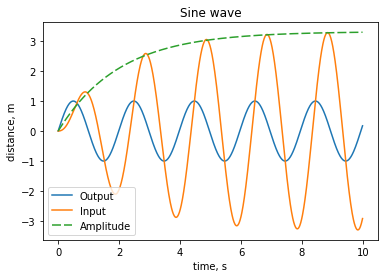

ValueError: shape mismatch: objects cannot be broadcast to a single shape

<Figure size 432x288 with 1 Axes>

In [13]:
import numpy as np
import control
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Time vector
T = 10; # s
dt = 0.01; # s
t = np.arange(0,T,dt);
N = len(t); # Number samples
startIndex = 100; # Action starts at index

# Mass spring damper properties
m = 1; # mass, kg
k = 10; # stifness, N/m
c = 1; # damping, sec/m
#omega_n = np.sqrt(k/m - c**2/(4*m**2)); # (damped) natural frequency [rad/s]
#print('omega_n =',omega_n,' rad/s');

# Properties
omega_n = np.sqrt(k/m); # Undamped natural frequency [rad/s]
c_crit = (2*np.sqrt(k*m));
zeta = c/c_crit;
omega_d = omega_n*np.sqrt(1-zeta**2)

# Tranfer function
num = np.array([c, k]);
den = np.array([m, c, k]);
sys = control.TransferFunction(num, den);

# Print results
print('c_crit =',c_crit);
print('zeta =', zeta);
print('omega_n =',omega_n,'rad/s')
print('omega_d =',omega_d,'rad/s')
print('H =',sys)

# Input signal
signalType = 4;
if signalType == 1: # Impulse input
	u = np.zeros(N);
	u[startIndex] = 1/dt;
	input = 'Impulse';
elif signalType == 2: # Step input
	u = np.zeros(N);
	u[startIndex:N] = 1;
	input = 'Step';
elif signalType == 3: # Ramp input
	u = np.zeros(N);
	u = (t-dt*startIndex)*0.1;
	u[0:startIndex] = 0;
	input = 'Ramp';
elif signalType == 4: # Resonance input
	u = np.sin(omega_n*t);
	[[[mag]]], phase, omega = control.freqresp(sys,[omega_n]);
	print('magnitude at omega_n =', mag);
	control.damp(sys, doprint=True);
	A = -mag*(np.exp(-c*t/(2*m))-1); # Calculate amplitude
	input = 'Sine wave';
elif signalType == 5:
	u = np.random.normal(0,1,N);
	intput = 'Noise';

# Initial state
X0 = 0;

# Simulate
T, yout, xout = control.forced_response(sys, t, u, X0);

# Show results
plt.figure(0)
plt.plot(t,u);
plt.plot(t,yout);
if signalType == 4:
    plt.plot(t,A,dashes=[6, 2]);

plt.xlabel('time, s');
plt.ylabel('distance, m');
plt.legend(['Output', 'Input', 'Amplitude'])
plt.title(input)

# Set up animation
fig1 = plt.figure(1)
mng = plt.get_current_fig_manager();

def move_figure(f, x, y):
	"""Move figure's upper left corner to pixel (x, y)"""
	backend = matplotlib.get_backend()
	if backend == 'TkAgg':
		f.canvas.manager.window.wm_geometry("+%d+%d" % (x, y))
	elif backend == 'WXAgg':
		f.canvas.manager.window.SetPosition((x, y))
	else:
		# This works for QT and GTK
		# You can also use window.setGeometry
		# f.canvas.manager.window.move(x, y)
		,

axes = plt.gca()
axes.set_ylim([-2,10])
axes.set_xlim([-5,5])
lineU, = plt.plot([-3,3],[0,0]);
lineY, = plt.plot([-2,2,2,-2,-2],[4,4,6,6,4]);
lineSpring, = plt.plot([-1.0,-1.0,-1.5,-0.5,-1.5,-0.5,-1.5,-0.5,-1.5,-1.0,-1.0],[0,0.6,0.8,1.2,1.6,2,2.4,2.8,3.2,3.6,4], color = 'k');
lineDamper1, = plt.plot([1,1],[0, 1.6], color = 'k')
lineDamper2, = plt.plot([0.5, 0.5, 1.5, 1.5],[2.8, 1.6, 1.6, 2.8], color = 'k')
lineDamper3, = plt.plot([1,1],[2.4, 4], color = 'k')

#move_figure(fig1, 700, 50)

def initU():
    lineU.set_ydata([np.nan] * 2)
    return lineU,

def initY():
    lineY.set_ydata([np.nan] * 2)
    return lineY,

def initSpring():
	lineSpring.set_ydata([np.nan] * 2)
	return lineSpring,

def initDamper1():
	lineDamper1.set_ydata([np.nan] * 2)
	return lineDamper1,
	
def initDamper2():
	lineDamper2.set_ydata([np.nan] * 2)
	return lineDamper2,
	
def initDamper3():
	lineDamper3.set_ydata([np.nan] * 2)
	return lineDamper3,

def animateIn(i):
    lineU.set_ydata([u[i],u[i]]) # update the input signal.
    return lineU,

def animateOut(i):
    lineY.set_ydata([yout[i]+4, yout[i]+4, yout[i]+6, yout[i]+6, yout[i]+4]) # update the output signal.
    return lineY,
	
def animateSpring(i):
	e = yout[i] - u[i] + 4;
	lineSpring.set_ydata([u[i], u[i]+0.15*e, u[i]+0.2*e, u[i]+0.3*e, u[i]+0.4*e, u[i]+0.5*e, u[i]+0.6*e, u[i]+0.7*e, u[i]+0.8*e, u[i]+0.85*e, 4+yout[i]])
	return lineSpring,
	
def animateDamper1(i):
	e = yout[i] - u[i] + 4;
	lineDamper1.set_ydata([u[i], u[i]+0.4*e])
	return lineDamper1,

def animateDamper2(i):
	e = yout[i] - u[i] + 4;
	lineDamper2.set_ydata([u[i]+0.7*e, u[i]+0.4*e,u[i]+0.4*e,u[i]+0.7*e])
	return lineDamper2,
	
def animateDamper3(i):
	e = yout[i] - u[i] + 4;
	lineDamper3.set_ydata([u[i]+0.6*e, 4+yout[i]])
	return lineDamper3,

# Set up formatting for the movie files
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=1/dt, metadata=dict(artist='Me'), bitrate=1800)	

# Animate
ani = []

deltaT = 1000*dt; # dt in miliseconds
line_ani = animation.FuncAnimation(fig1, animateIn, init_func = initU, frames = N, interval = deltaT, repeat = False) # blit=True, save_count=50)
ani.append(line_ani)
ani.append(animation.FuncAnimation(fig1, animateOut, init_func = initY, frames = N, interval = deltaT, repeat = False))
ani.append(animation.FuncAnimation(fig1, animateSpring, init_func = initSpring, frames = N, interval = deltaT, repeat = False))
ani.append(animation.FuncAnimation(fig1, animateDamper1, init_func = initDamper1, frames = N, interval = deltaT, repeat = False))
ani.append(animation.FuncAnimation(fig1, animateDamper2, init_func = initDamper2, frames = N, interval = deltaT, repeat = False))
ani.append(animation.FuncAnimation(fig1, animateDamper3, init_func = initDamper3, frames = N, interval = deltaT, repeat = False))

# Save the animation
#line_ani.save('vibrations.mp4',writer = writer)

plt.show()